# Pymaceuticals Inc.
---

### Analysis


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df= pd.merge(study_results, mouse_metadata, how= "right", on="Mouse ID")

# Display the data table for preview
combined_df.head()
# combined_df.tail()
# combined_df.info()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
print(f"Number of unique mice : {unique_mice}")

Number of unique mice : 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mouse_ids = combined_df['Mouse ID'][combined_df.duplicated()].to_numpy()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_g989 = combined_df[combined_df["Mouse ID"] == "g989"]
dupe_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#if we should've dropping only duplicate we would use this formula
# cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

#but as mouse g989 data looks misrepresented in DF we shall exclude it from our analysis
cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicated_mouse_ids)==False]
cleaned_df.head()
# cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df_mice = cleaned_df['Mouse ID'].nunique()
print(f"Number of unique mice after cleaning data : {cleaned_df_mice}")

Number of unique mice after cleaning data : 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# # Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_drug_df = summary_stats.rename(columns={
    "Mean": "Mean Tumor Volume",
    "Median": "Median Tumor Volume",
    "Variance": "Tumor Volume Variance",
    "Std_Dev": "Tumor Volume Std. Dev.",
    "SEM": "Tumor Volume Std. Err."
})    
summary_drug_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

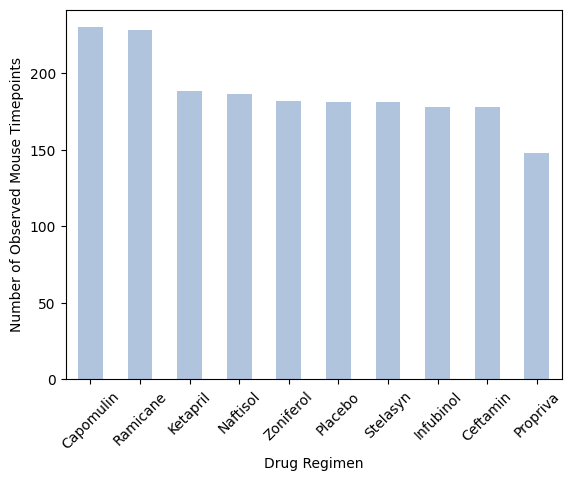

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_tests = cleaned_df['Drug Regimen'].value_counts()

drug_tests.plot(kind="bar", color="lightsteelblue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

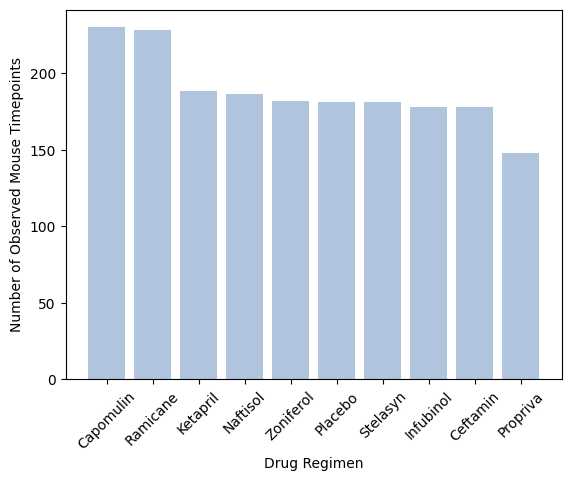

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_tests.index.values
y_axis = drug_tests.values
plt.bar(x_axis, y_axis, color="lightsteelblue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation =45)
plt.show

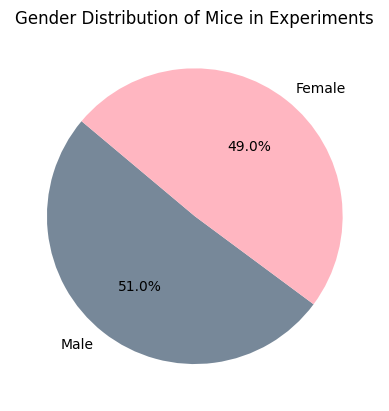

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
genders = cleaned_df['Sex'].value_counts()
# Get the unique mice with their gender
genders.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    ylabel='', 
    colors=['lightslategray', 'lightpink'],
    title='Gender Distribution of Mice in Experiments') 

# Make the pie chart
plt.show()

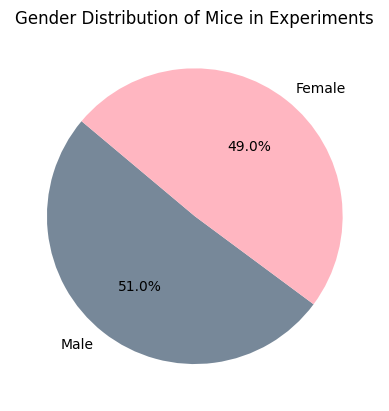

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(
    genders, 
    labels=genders.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightslategray', 'lightpink'])
plt.title('Gender Distribution of Mice in Experiments')


# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
last_timepoints = last_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, cleaned_df, on=["Drug Regimen", "Mouse ID", "Timepoint"], how='left')
# print(final_tumor_volume_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']])
final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatments to analyze
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to store tumor volumes
tumor_volume_list = []

# Loop through each treatment to locate tumor volume data and calculate IQR
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # Add the tumor volume subset to the list
    tumor_volume_list.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print out the potential outliers for each drug
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


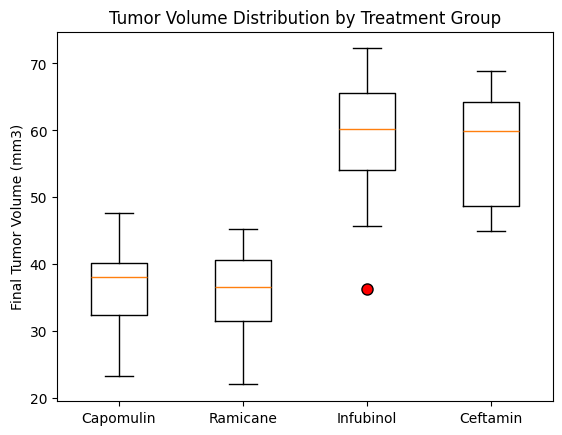

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_list, labels=treatment_list, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title("Tumor Volume Distribution by Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

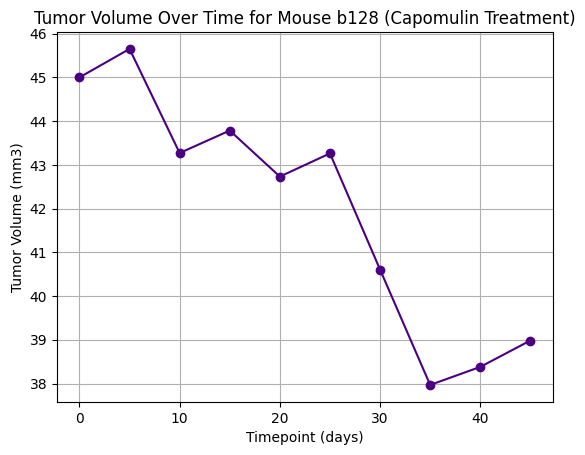

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "b128"
One_mouse_capomulin_progress = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")&(cleaned_df["Mouse ID"] == mouse_id)]

# Generating the line plot
x = One_mouse_capomulin_progress ["Timepoint"]
y = One_mouse_capomulin_progress ["Tumor Volume (mm3)"]
plt.plot(x,y, marker='o', linestyle='-', color='indigo')
plt.title(f"Tumor Volume Over Time for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

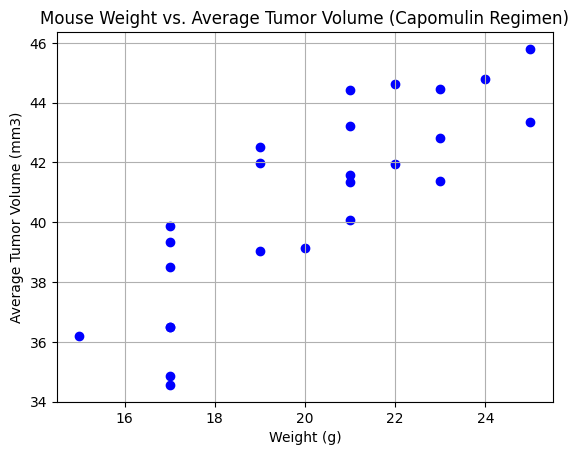

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

plt.scatter(mouse_weights, average_tumor_volume, color='b')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.842


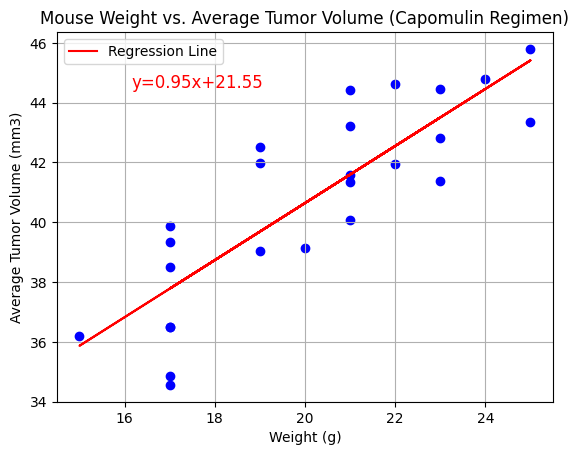

In [18]:
# Calculate the correlation coefficient and a linear regression model


# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weights, average_tumor_volume)[0]
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.3f}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(mouse_weights, average_tumor_volume, color='b')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumor_volume)
regression_values = slope * mouse_weights + intercept
# line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(mouse_weights, regression_values, color='r', label='Regression Line')
plt.annotate(line_eq, xy=(0.15, 0.85), xycoords="axes fraction", fontsize=12, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()